In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
# Read the Excel file
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Info_BDApnea_QuironMalaga.xlsx'
df = pd.read_excel(file_path)

# Select the required columns
df = df[['Patient', 'Gender', 'Edad', 'Talla', 'Peso', 'IAH', 'PerCervical', 'Fumador', 'Roncador','Enfermedades']]

# Rename the columns
df.rename(columns={
    'Edad': 'Age',
    'Talla': 'Height',
    'Peso': 'Weight',
    'PerCervical': 'Cervical',
    'Fumador': 'Smoker',
    'Roncador': 'Snorer',
    'Enfermedades': 'Diseases'
}, inplace=True)

# Convert Weight column to float
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Remove rows with non-numerical values and rows with -1 or NaN
df = df.dropna()
df = df[(df != -1).all(axis=1)]

# Save the resulting data frame to a new Excel file
output_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA.xlsx'
df.to_excel(output_path, index=False)

In [4]:
print(df.head())
df.describe()
print(df.dtypes)
df.describe()

  Patient  Gender   Age  Height  Weight   IAH  Cervical Smoker Snorer  \
1   P0002  hombre  56.0   174.0   119.0  29.6      48.0     si     ns   
3   P0004  hombre  39.0   168.0    78.0  19.7      42.0     no     ns   
4   P0005  hombre  32.0   173.0    80.0   9.0      40.0     no     ns   
5   P0006  hombre  32.0   190.0   109.0   2.0      42.0     no     ns   
6   P0007  hombre  39.0   169.0    86.0  34.0      42.0     no     ns   

                       Diseases  
1                            nd  
3      Hiperactividad_bronquial  
4  Septo_Nasal_Desviado_Operado  
5  Hipertrofia_cornetes_nasales  
6                      Cornetes  
Patient      object
Gender       object
Age         float64
Height      float64
Weight      float64
IAH         float64
Cervical    float64
Smoker       object
Snorer       object
Diseases     object
dtype: object


,Age,Height,Weight,IAH,Cervical
count,635.000000,635.000000,635.000000,635.000000,635.000000
mean,49.492913,171.278740,87.737008,20.354898,40.637008
std,12.387329,9.570069,18.379331,18.612508,3.962876
min,20.000000,144.000000,45.000000,0.000000,30.000000
25%,40.000000,165.000000,75.000000,6.350000,38.000000
50%,49.000000,171.000000,86.000000,14.300000,41.000000
75%,59.000000,178.000000,98.000000,30.000000,43.000000
max,88.000000,197.000000,165.000000,108.600000,53.000000


<Axes: >

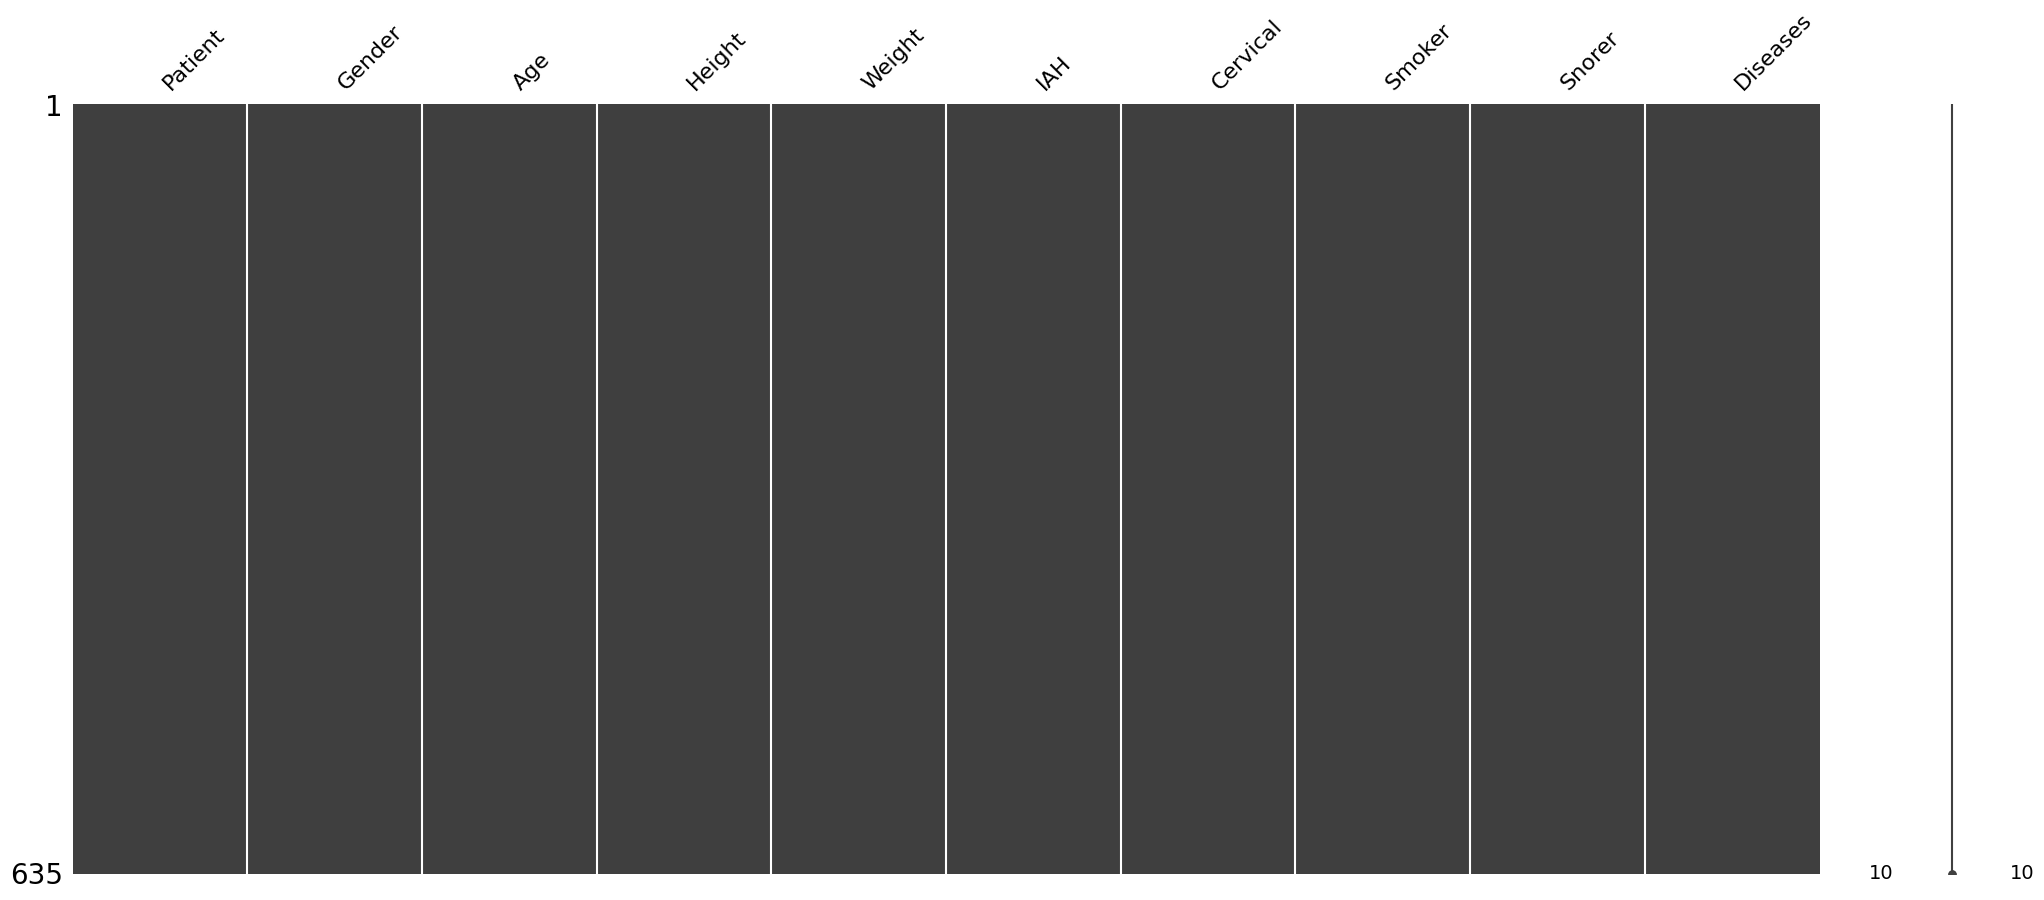

In [5]:
import missingno as msno

df = df.replace(-1.0,np.nan)
msno.matrix(df)


A partir de este punto empieza el EDA!!!!!!!!!!!!!!!!!!!!!


In [6]:
#Filtramos los datos por generos y contamos cuantos hay de cada uno que no tienen valores nulos en IAH
filtered_df = df.dropna()
result = filtered_df.groupby('Gender')['IAH'].count()
print(result)


Gender
hombre    453
mujer     182
Name: IAH, dtype: int64


In [7]:
#Filtramos los datos por generos y contamos cuantos hay de cada uno que no tienen valores nulos en IAH y que el valor de IAH sea mayor que 30
Result = df[df['IAH'] > 30].groupby('Gender')['IAH'].count()
print(Result)

Gender
hombre    125
mujer      28
Name: IAH, dtype: int64


In [8]:
#Filtramos los datos por generos y contamos cuantos hay de cada uno que no tienen valores nulos en IAH y que el valor de IAH sea menor que 15
Result = df[df['IAH'] < 15].groupby('Gender')['IAH'].count()
print(Result)

Gender
hombre    199
mujer     123
Name: IAH, dtype: int64


In [9]:
#Filtramos los datos por generos y contamos cuantos hay de cada uno que no tienen valores nulos en IAH y que el valor de IAH este entre 15 y 30
Result = df[df['IAH'].between(15, 30)].groupby('Gender')['IAH'].count()
print(Result)

Gender
hombre    129
mujer      31
Name: IAH, dtype: int64


HISTOGRAMAS!!!

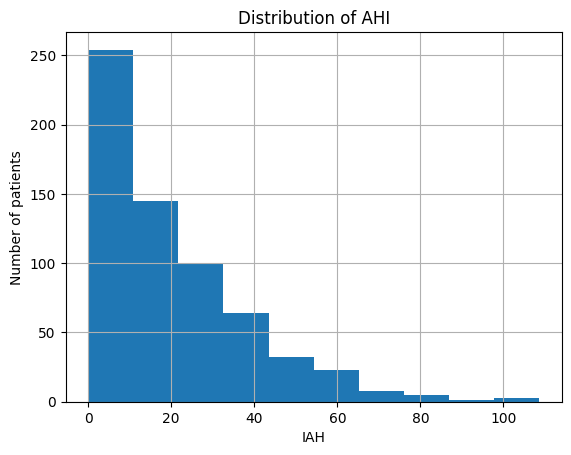

In [5]:
# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)


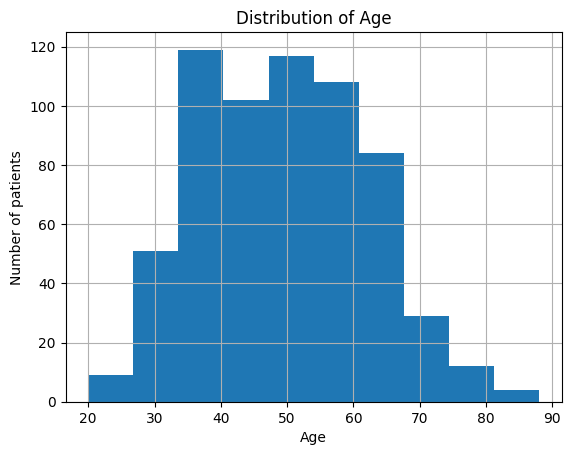

In [6]:
# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

df['Age'].hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()

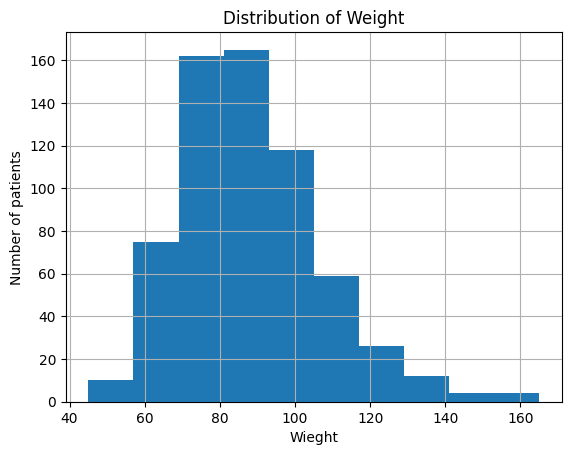

In [24]:
# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

df['Weight'].hist()
plt.title('Distribution of Weight')
plt.xlabel('Wieght')
plt.ylabel('Number of patients')
plt.show()

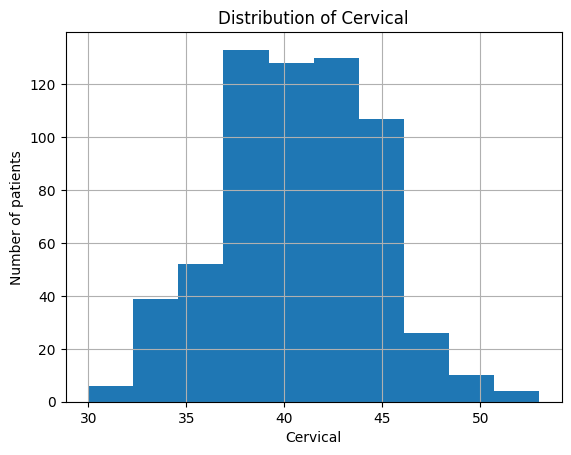

In [23]:
# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

df['Cervical'].hist()
plt.title('Distribution of Cervical')
plt.xlabel('Cervical')
plt.ylabel('Number of patients')
plt.show()

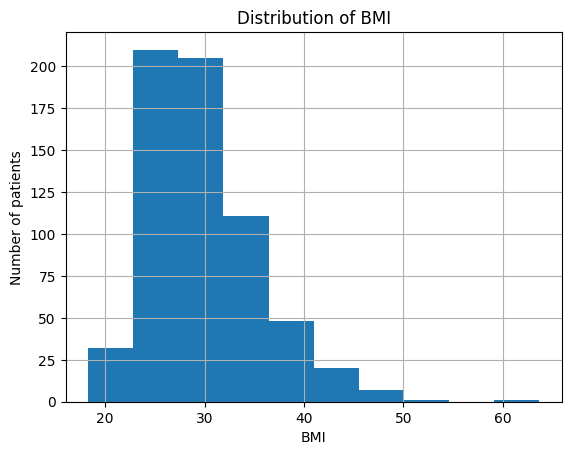

In [22]:
# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

df['BMI'].hist()
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Number of patients')
plt.show()

In [11]:
# Create a new column with the BMI y la guarda en el excel
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
print(df.head())
output_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/C'
df.to_excel(output_path, index=False)

  Patient  Gender  Age  Height  Weight   IAH  Cervical Smoker Snorer  \
0   P0002  hombre   56     174     119  29.6      48.0     si     ns   
1   P0004  hombre   39     168      78  19.7      42.0     no     ns   
2   P0005  hombre   32     173      80   9.0      40.0     no     ns   
3   P0006  hombre   32     190     109   2.0      42.0     no     ns   
4   P0007  hombre   39     169      86  34.0      42.0     no     ns   

                       Diseases        BMI  
0                            nd  39.305060  
1      Hiperactividad_bronquial  27.636054  
2  Septo_Nasal_Desviado_Operado  26.729927  
3  Hipertrofia_cornetes_nasales  30.193906  
4                      Cornetes  30.110991  


Correlation matrix que correlaciona valores numericos DE LOS Datos_Limpios_OSA_mas_BMI.xlsx

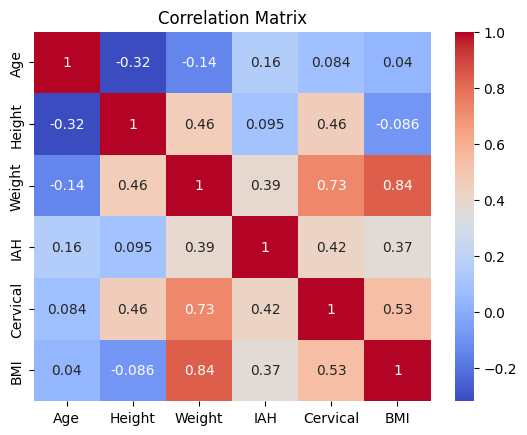

               Age    Height    Weight       IAH  Cervical       BMI
Age       1.000000 -0.319193 -0.138965  0.157340  0.083608  0.039684
Height   -0.319193  1.000000  0.461673  0.095377  0.455209 -0.086137
Weight   -0.138965  0.461673  1.000000  0.391565  0.726175  0.838098
IAH       0.157340  0.095377  0.391565  1.000000  0.421827  0.370028
Cervical  0.083608  0.455209  0.726175  0.421827  1.000000  0.534977
BMI       0.039684 -0.086137  0.838098  0.370028  0.534977  1.000000


,Age,Height,Weight,IAH,Cervical,BMI
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,49.492913,171.278740,87.737008,20.354898,40.637008,29.866600
std,12.387329,9.570069,18.379331,18.612508,3.962876,5.627534
min,20.000000,144.000000,45.000000,0.000000,30.000000,18.289895
25%,40.000000,165.000000,75.000000,6.350000,38.000000,26.033686
50%,49.000000,171.000000,86.000000,14.300000,41.000000,28.731747
75%,59.000000,178.000000,98.000000,30.000000,43.000000,32.770513
max,88.000000,197.000000,165.000000,108.600000,53.000000,63.654952


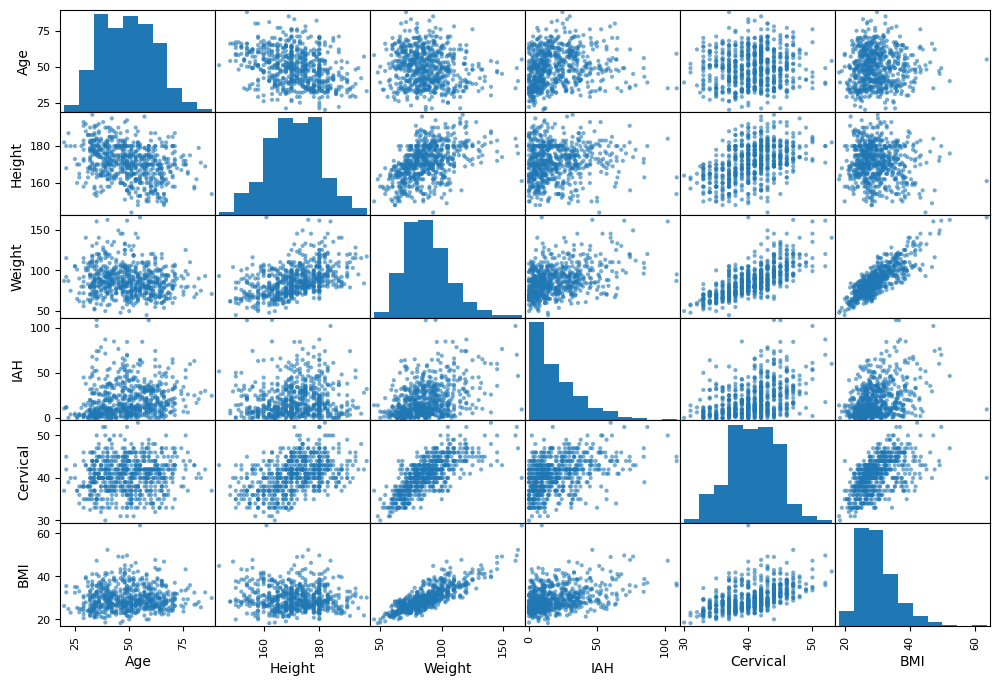

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)
df2 = df[['Age', 'Height', 'Weight', 'IAH', 'Cervical','BMI']]

correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
axes = scatter_matrix(df2, alpha=0.6, figsize=(12, 8), diagonal='hist')

#crear tabla de correlacionm
df_numeric = df2.select_dtypes(include=[float, int])
corr = df_numeric.corr()
print(corr)
df2.describe()

relacionar dos varibales que no tienen porque ser numerica es decir son categoricas y se usa la grafica de dispersion.

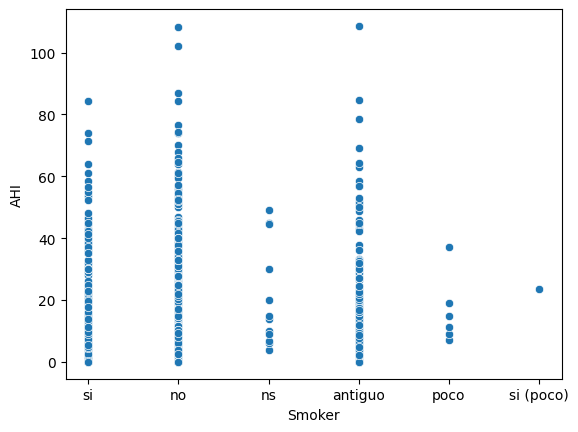

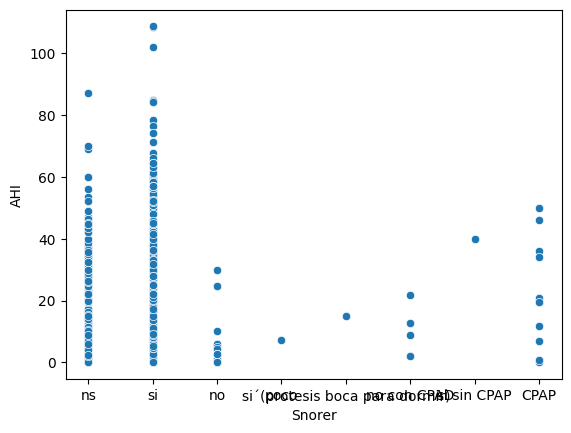

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ruta del archivo Excel
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Asegúrate de que la columna 'AHI' existe
if 'AHI' in df.columns and 'Smoker' in df.columns:
    # Crear un scatter plot
    sns.scatterplot(x='Smoker', y='AHI', data=df)
    plt.show()
else:
    print("Las columnas 'AHI' y/o 'Gender' no existen en el DataFrame.")

# Asegúrate de que la columna 'AHI' existe
if 'AHI' in df.columns and 'Snorer' in df.columns:
    # Crear un scatter plot
    sns.scatterplot(x='Snorer', y='AHI', data=df)
    plt.show()
else:
    print("Las columnas 'AHI' y/o 'Gender' no existen en el DataFrame.")

EDA Clasificacion (Hombre/Mujer)

In [30]:
import pandas as pd

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

# Verificar los nombres de las columnas
print(df.columns)

# Segmentar los datos en dos DataFrames, uno para hombres y otro para mujeres
df_masculino = df[df['Gender'] == 'hombre']
df_femenino = df[df['Gender'] == 'mujer']

# Guardar los DataFrames segmentados en dos archivos Excel distintos
df_masculino.to_excel('/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Masculino.xlsx', index=False)
df_femenino.to_excel('/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Femenino.xlsx', index=False)

print("Archivos guardados exitosamente.")

Index(['Patient', 'Gender', 'Age', 'Height', 'Weight', 'IAH', 'Cervical',
       'Smoker', 'Snorer', 'Diseases', 'BMI'],
      dtype='object')
Archivos guardados exitosamente.


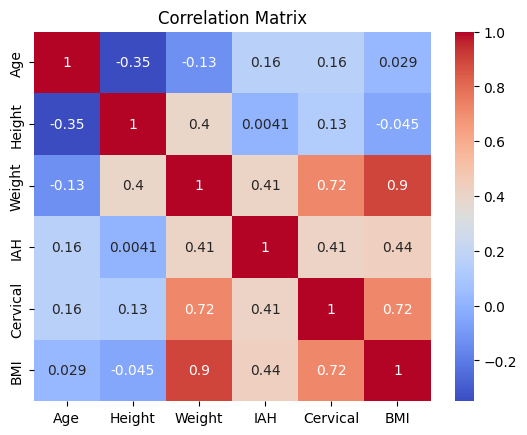

               Age    Height    Weight       IAH  Cervical       BMI
Age       1.000000 -0.349164 -0.129451  0.157001  0.156879  0.029309
Height   -0.349164  1.000000  0.398035  0.004051  0.130806 -0.045114
Weight   -0.129451  0.398035  1.000000  0.408054  0.717153  0.896027
IAH       0.157001  0.004051  0.408054  1.000000  0.413062  0.435741
Cervical  0.156879  0.130806  0.717153  0.413062  1.000000  0.719007
BMI       0.029309 -0.045114  0.896027  0.435741  0.719007  1.000000


,Age,Height,Weight,IAH,Cervical,BMI
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,48.836645,175.401766,91.741722,22.483355,42.181015,29.787615
std,12.552537,7.285104,17.219354,18.398839,3.187766,5.079081
min,20.000000,152.000000,61.000000,0.000000,34.000000,20.061728
25%,39.000000,170.000000,80.000000,8.700000,40.000000,26.173833
50%,48.000000,175.000000,89.000000,17.200000,42.000000,28.734694
75%,58.000000,180.000000,100.000000,33.000000,44.000000,32.407407
max,85.000000,197.000000,162.000000,102.000000,53.000000,52.298554


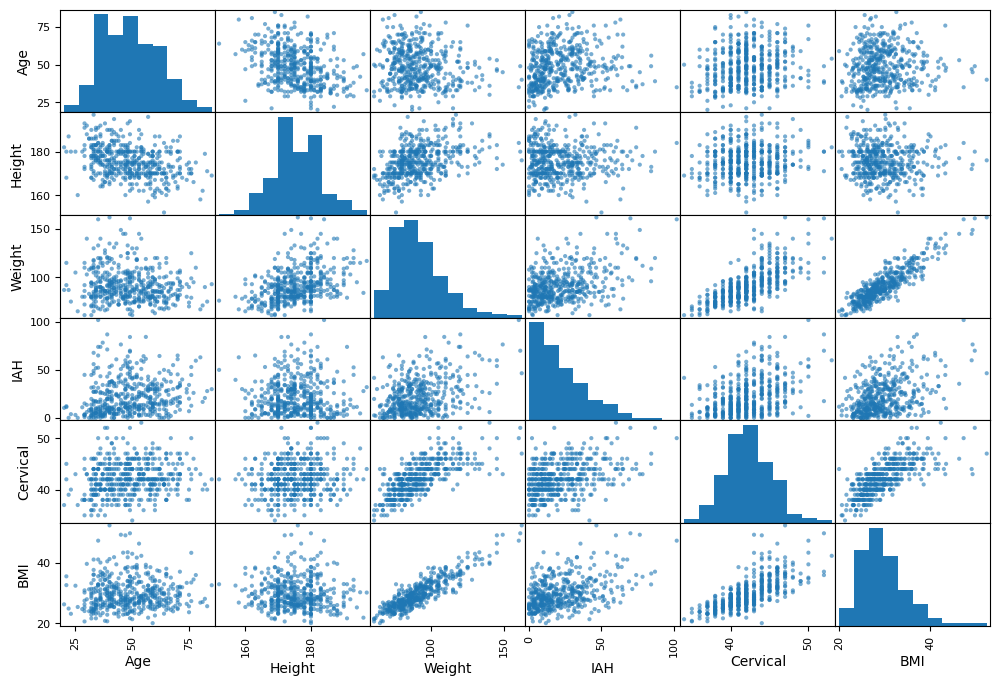

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Masculino.xlsx'
df = pd.read_excel(file_path)
df2 = df[['Age', 'Height', 'Weight', 'IAH', 'Cervical','BMI']]

correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
axes = scatter_matrix(df2, alpha=0.6, figsize=(12, 8), diagonal='hist')

#crear tabla de correlacionm
df_numeric = df2.select_dtypes(include=[float, int])
corr = df_numeric.corr()
print(corr)
df2.describe()

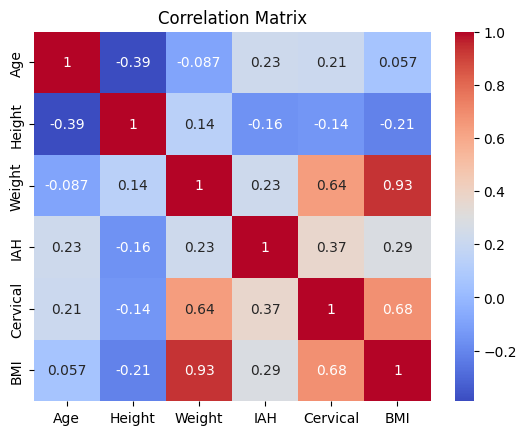

               Age    Height    Weight       IAH  Cervical       BMI
Age       1.000000 -0.390419 -0.087348  0.226952  0.214681  0.056631
Height   -0.390419  1.000000  0.141769 -0.161544 -0.144298 -0.214742
Weight   -0.087348  0.141769  1.000000  0.228048  0.638142  0.933488
IAH       0.226952 -0.161544  0.228048  1.000000  0.367689  0.287690
Cervical  0.214681 -0.144298  0.638142  0.367689  1.000000  0.681157
BMI       0.056631 -0.214742  0.933488  0.287690  0.681157  1.000000


,Age,Height,Weight,IAH,Cervical,BMI
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,51.126374,161.016484,77.769231,15.057143,36.793956,30.063192
std,11.842449,6.310979,17.399484,18.125350,2.969014,6.815689
min,25.000000,144.000000,45.000000,0.000000,30.000000,18.289895
25%,42.000000,156.000000,65.000000,3.825000,35.000000,24.967971
50%,51.000000,162.000000,73.000000,8.950000,37.000000,28.635804
75%,60.000000,165.000000,89.750000,20.000000,39.000000,34.644408
max,88.000000,179.000000,165.000000,108.600000,45.000000,63.654952


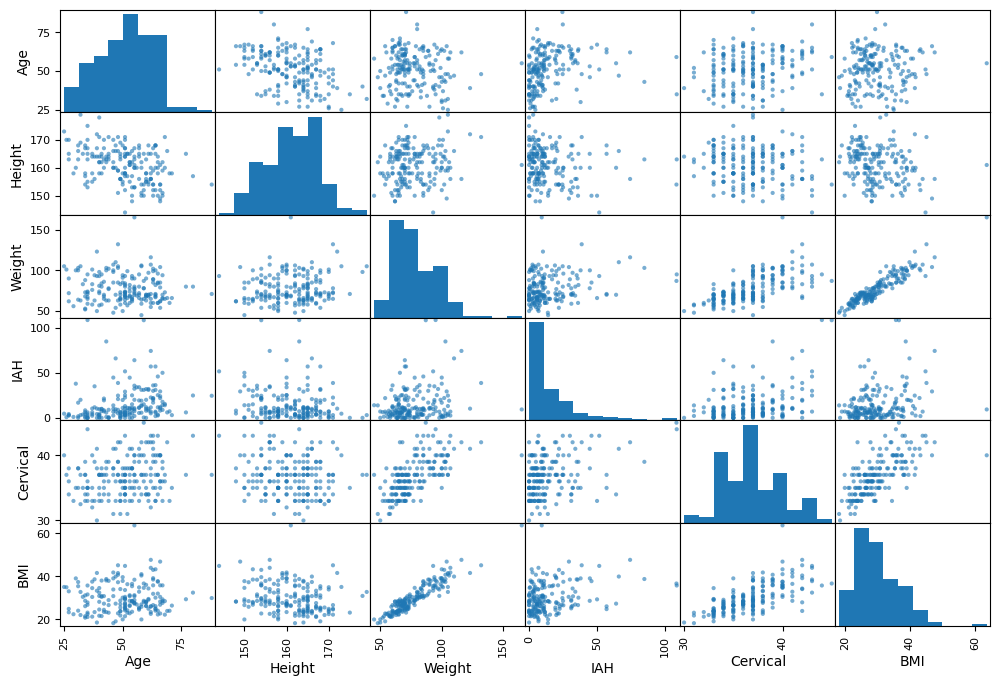

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Femenino.xlsx'
df = pd.read_excel(file_path)
df2 = df[['Age', 'Height', 'Weight', 'IAH', 'Cervical','BMI']]

correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
axes = scatter_matrix(df2, alpha=0.6, figsize=(12, 8), diagonal='hist')

#crear tabla de correlacionm
df_numeric = df2.select_dtypes(include=[float, int])
corr = df_numeric.corr()
print(corr)
df2.describe()

Clauster!!!!

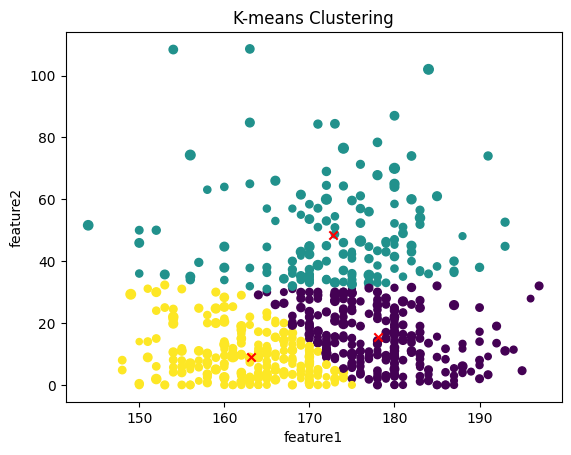

In [36]:
# K nearest neighbors
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar los datos
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

X = df[['Height', 'IAH', 'BMI']]  # Selecciona las características para el clustering

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar los clusters
plt.scatter(X['Height'], X['IAH'], X['BMI'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

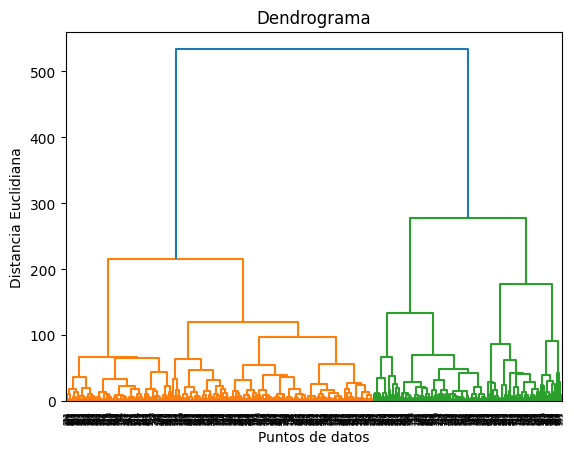


KeyboardInterrupt



In [47]:
# jerarquico clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrograma para decidir el número de clusters
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Aplicar clustering jerárquico con un número de clusters elegido
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_hc = hc.fit_predict(X)

# Visualizar los clusters
plt.scatter(X['feature1'], X['feature2'], c=labels_hc, cmap='viridis')
plt.title('Clustering Jerárquico')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()


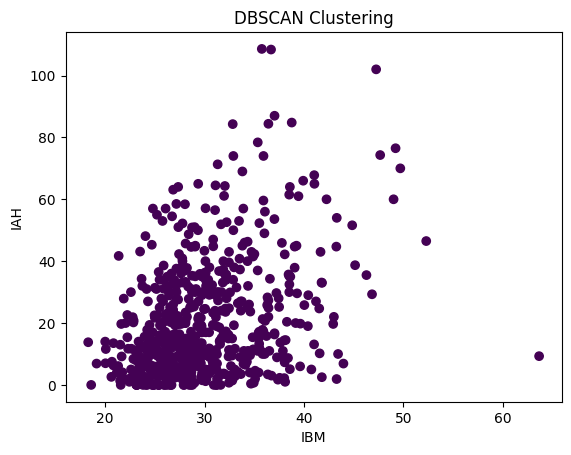

In [17]:
#DBSCAM
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Visualizar los clusters
plt.scatter(X['BMI'], X['IAH'], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('IBM')
plt.ylabel('IAH')
plt.show()


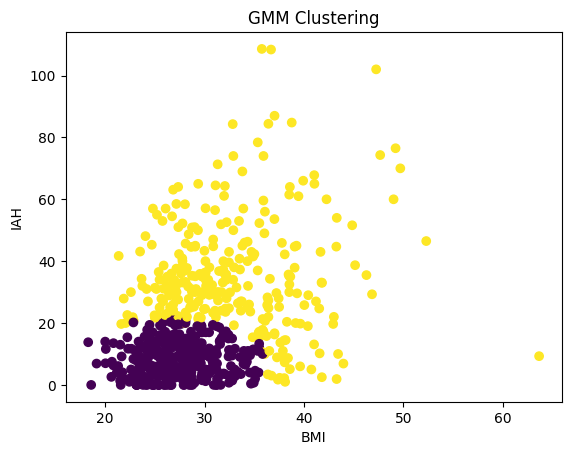

In [18]:
#Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

# Aplicar GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)
labels_gmm = gmm.predict(X)

# Visualizar los clusters
plt.scatter(X['BMI'], X['IAH'], c=labels_gmm, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('BMI')
plt.ylabel('IAH')
plt.show()


SUPERPOSICION DE CARACTERISTICAS Copilot_OSA_extreme_male.xlsx!!!

  Patient  Gender   IAH  Weight  Age  Height  Cervical        BMI      OSA
0   P0005  hombre   9.0      80   32     173        40  26.729927  Healthy
1   P0006  hombre   2.0     109   32     190        42  30.193906  Healthy
2   P0007  hombre  34.0      86   39     169        42  30.110991   Severe
3   P0008  hombre  60.0     145   47     172        44  49.012980   Severe
4   P0013  hombre   3.7      90   36     180        40  27.777778  Healthy
Index(['Patient', 'Gender', 'IAH', 'Weight', 'Age', 'Height', 'Cervical',
       'BMI', 'OSA'],
      dtype='object')


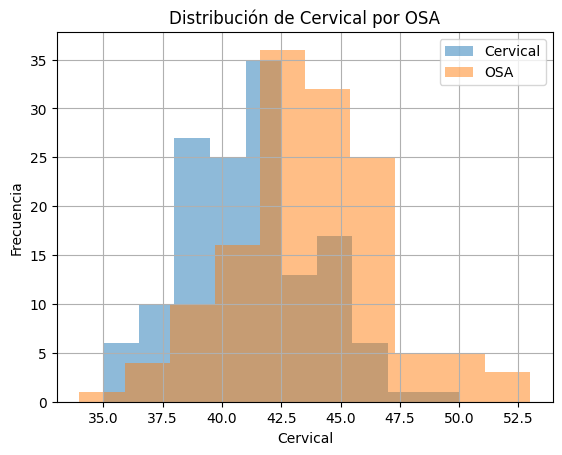

In [7]:
# Define la ruta del archivo
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Copilot_OSA_extreme_male.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

print(df.head())
# Imprime los nombres de las columnas para verificar
print(df.columns)

# Asegúrate de que la columna 'OSA' exista en el DataFrame
if 'OSA' in df.columns:
    # Crea histogramas agrupados por 'OSA'
    df.groupby('OSA')['Cervical'].hist(alpha=0.5)
    plt.title('Distribución de Cervical por OSA')
    plt.xlabel('Cervical')
    plt.ylabel('Frecuencia')
    plt.legend(['Cervical', 'OSA'])  # Ajusta las etiquetas según tus datos
    plt.show()
else:
    print("La columna 'OSA' no existe en el DataFrame.")

  Patient  Gender   IAH  Weight  Age  Height  Cervical        BMI      OSA
0   P0005  hombre   9.0      80   32     173        40  26.729927  Healthy
1   P0006  hombre   2.0     109   32     190        42  30.193906  Healthy
2   P0007  hombre  34.0      86   39     169        42  30.110991   Severe
3   P0008  hombre  60.0     145   47     172        44  49.012980   Severe
4   P0013  hombre   3.7      90   36     180        40  27.777778  Healthy
Index(['Patient', 'Gender', 'IAH', 'Weight', 'Age', 'Height', 'Cervical',
       'BMI', 'OSA'],
      dtype='object')


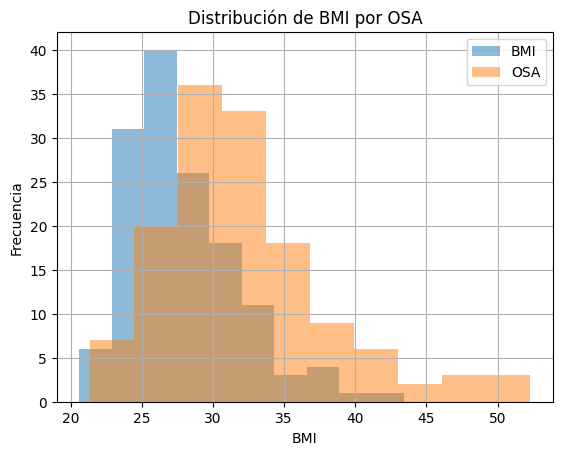

In [43]:
# Define la ruta del archivo
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Copilot_OSA_extreme_male.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

print(df.head())
# Imprime los nombres de las columnas para verificar
print(df.columns)

# Asegúrate de que la columna 'OSA' exista en el DataFrame
if 'OSA' in df.columns:
    df.groupby('OSA')['BMI'].hist(alpha=0.5)
    plt.title('Distribución de BMI por OSA')
    plt.xlabel('BMI')
    plt.ylabel('Frecuencia')
    plt.legend(['BMI', 'OSA'])  # Ajusta las etiquetas según tus datos
    plt.show()
else:
    print("La columna 'OSA' no existe en el DataFrame.")

  Patient  Gender   IAH  Weight  Age  Height  Cervical        BMI      OSA
0   P0005  hombre   9.0      80   32     173        40  26.729927  Healthy
1   P0006  hombre   2.0     109   32     190        42  30.193906  Healthy
2   P0007  hombre  34.0      86   39     169        42  30.110991   Severe
3   P0008  hombre  60.0     145   47     172        44  49.012980   Severe
4   P0013  hombre   3.7      90   36     180        40  27.777778  Healthy
Index(['Patient', 'Gender', 'IAH', 'Weight', 'Age', 'Height', 'Cervical',
       'BMI', 'OSA'],
      dtype='object')


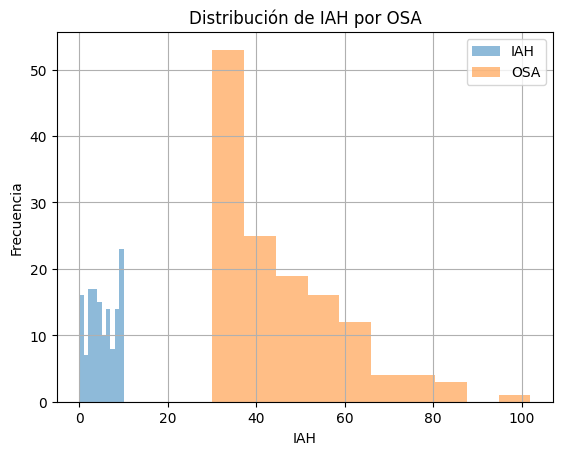

In [42]:
# Define la ruta del archivo
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Copilot_OSA_extreme_male.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

print(df.head())
# Imprime los nombres de las columnas para verificar
print(df.columns)

# Asegúrate de que la columna 'OSA' exista en el DataFrame
if 'OSA' in df.columns:
    df.groupby('OSA')['IAH'].hist(alpha=0.5)
    plt.title('Distribución de IAH por OSA')
    plt.xlabel('IAH')
    plt.ylabel('Frecuencia')
    plt.legend(['IAH', 'OSA'])  # Ajusta las etiquetas según tus datos
    plt.show()
else:
    print("La columna 'OSA' no existe en el DataFrame.")

  Patient  Gender   IAH  Weight  Age  Height  Cervical        BMI      OSA
0   P0005  hombre   9.0      80   32     173        40  26.729927  Healthy
1   P0006  hombre   2.0     109   32     190        42  30.193906  Healthy
2   P0007  hombre  34.0      86   39     169        42  30.110991   Severe
3   P0008  hombre  60.0     145   47     172        44  49.012980   Severe
4   P0013  hombre   3.7      90   36     180        40  27.777778  Healthy
Index(['Patient', 'Gender', 'IAH', 'Weight', 'Age', 'Height', 'Cervical',
       'BMI', 'OSA'],
      dtype='object')


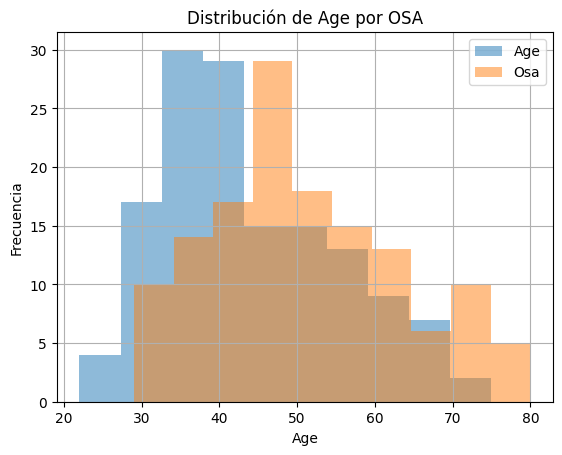

In [41]:
# Define la ruta del archivo
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Copilot_OSA_extreme_male.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

print(df.head())
# Imprime los nombres de las columnas para verificar
print(df.columns)

# Asegúrate de que la columna 'OSA' exista en el DataFrame
if 'OSA' in df.columns:
    df.groupby('OSA')['Age'].hist(alpha=0.5)
    plt.title('Distribución de Age por OSA')
    plt.xlabel('Age')
    plt.ylabel('Frecuencia')
    plt.legend(['Age', 'Osa'])  # Ajusta las etiquetas según tus datos
    plt.show()
else:
    print("La columna 'OSA' no existe en el DataFrame.")

MODELOS!!!!!!!!!!!!!!!

CLASIFICACION!!!

In [3]:
#columns = df.columns.tolist()
#columns = [c for c in columns if c not in ["Patient","Gender","IAH","OSA","BMI","Age"]]
 
#target = "OSA"

Logistic regression + Logistic regression con validacion


Evaluando para umbral 1

Evaluando para umbral 2

Evaluando para umbral 3

Evaluando para umbral 4
Accuracy: 0.8219895287958116
Confusion Matrix:
[[150   2]
 [ 32   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       152
           1       0.78      0.18      0.29        39

    accuracy                           0.82       191
   macro avg       0.80      0.58      0.59       191
weighted avg       0.81      0.82      0.77       191



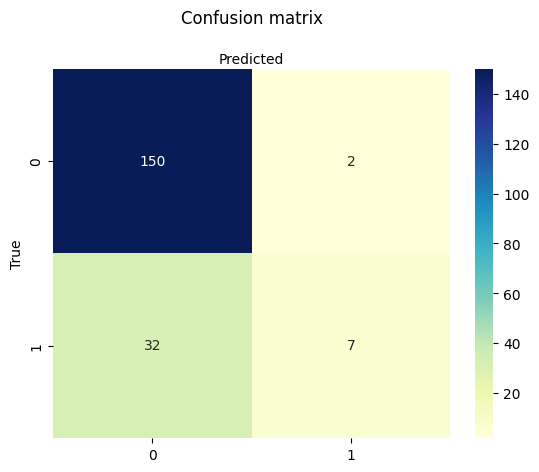

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Leer el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

#FILTAR LOS DATOS MALE Y LUEGO PONER FILTRO (REPETIR PARA MUJER)
# Seleccionar características (X) y la variable objetivo (y)
X = df[['BMI','Age','Cervical']]  # Variables independientes

# Convertir la variable continua 'IAH' en una variable binaria
# Por ejemplo, umbral de 15 para clasificar como OSA (1) o no OSA (0) REVISAR ESTE UMBRAL
# Definir diferentes umbrales para la variable objetivo (y)
umbrales = [
    (df['AHI'] > 5).astype(int),  # 5 < x
    ((df['AHI'] > 5) & (df['AHI'] < 15)).astype(int),  # 5 < x < 15
    ((df['AHI'] >= 15) & (df['AHI'] < 30)).astype(int),  # 15 <= x < 30
    (df['AHI'] >= 30).astype(int)  # x >= 30
]

# Evaluar el modelo para cada umbral
for i, y in enumerate(umbrales):
    print(f'\nEvaluando para umbral {i+1}')
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Inicializar el modelo
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo EN FUNCION SI ES HOMBRE O MUJER ES DECIR-> SEPAR EN DF HOMBRE Y DF MUJER DB, ENTRENAR Y EVALUAR CON CADA DF(DF2 Y DF3)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred) 
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels)) 
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(cnf_matrix)
print('Classification Report:')
print(class_report)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Accuracy: 0.6792452830188679
Confusion Matrix:
[[62 38]
 [30 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       100
           1       0.68      0.73      0.71       112

    accuracy                           0.68       212
   macro avg       0.68      0.68      0.68       212
weighted avg       0.68      0.68      0.68       212



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Accuracy: 0.6933962264150944
Confusion Matrix:
[[86 30]
 [35 61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       116
           1       0.67      0.64      0.65        96

    accuracy                           0.69       212
   macro avg       0.69      0.69      0.69       212
weighted avg       0.69      0.69      0.69       212



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Accuracy: 0.6587677725118484
Confusion Matrix:
[[71 35]
 [37 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       106
           1       0.66      0.65      0.65       105

    accuracy                           0.66       211
   macro avg       0.66      0.66      0.66       211
weighted avg       0.66      0.66      0.66       211

Mean Accuracy: 0.6587677725118484
Standard Deviation: 0.0


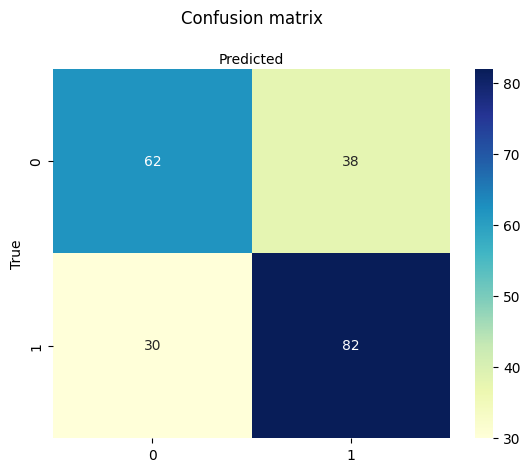

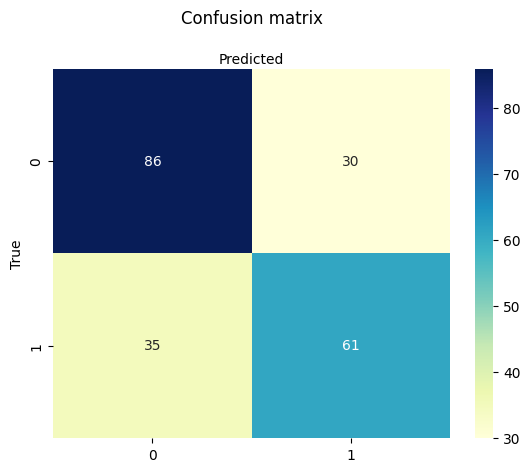

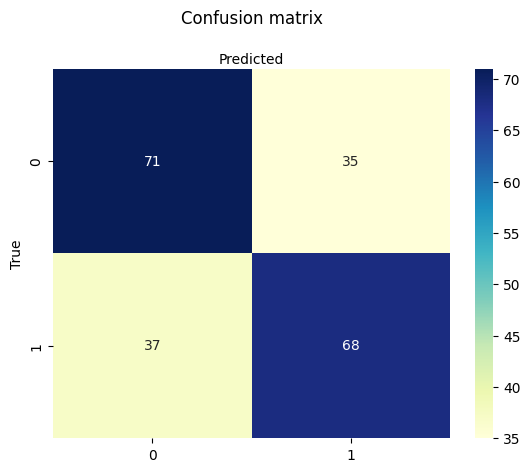

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

# Convertir la variable continua 'IAH' en una variable binaria
df['OSA'] = (df['AHI'] >= 15).astype(int)
# Convierte la columna 'Gender' a una representación numérica 1 o 0
df['Gender'] = (df['Gender'] == 'hombre').astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['BMI', 'Age', 'Cervical', 'Gender']]
y = df['OSA']  # Variable dependiente (0 o 1)

# Inicializar el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Definir el espacio de búsqueda para Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Definir bucle externo
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)
outer_results = []

for train_ix, test_ix in cv_outer.split(X):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    # Definir bucle interno
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)

    # Aplicar Grid Search con validación cruzada K-Fold interna
    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner, refit=True)
    result = search.fit(X_train, y_train)

    # Mejor modelo encontrado por Grid Search
    best_model = result.best_estimator_

    # Predicciones sobre los datos de prueba
    y_pred = best_model.predict(X_test)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    cnf_matrix = confusion_matrix(y_test, y_pred) 
    labels = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(labels)) 
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') 
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    class_report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(cnf_matrix)
    print('Classification Report:')
    print(class_report)

print(f'Mean Accuracy: {np.mean(accuracy)}')
print(f'Standard Deviation: {np.std(accuracy)}')

Support Vector Classifier

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

# Convierte la columna 'Gender' a una representación numérica
#df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Convertir la variable continua 'IAH' en una variable binaria
# Por ejemplo, umbral de 15 para clasificar como OSA (1) o no OSA (0)
df['IAH'] = (df['IAH'] >= 15).astype(int)
df['Smoker'] = (df['Smoker'] == 'S').astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['BMI', 'Age','Cervical','Smoker']]  # Variables independientes
y = df['IAH']  # Variable dependiente (0 o 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo SVM
model = SVC(kernel='linear', random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.6701570680628273
Confusion Matrix:
[[58 35]
 [28 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        93
           1       0.67      0.71      0.69        98

    accuracy                           0.67       191
   macro avg       0.67      0.67      0.67       191
weighted avg       0.67      0.67      0.67       191



Decision Tree Classifier

Index(['Patient', 'Gender', 'Age', 'Height', 'Weight', 'IAH', 'Cervical',
       'Smoker', 'Snorer', 'Diseases', 'BMI'],
      dtype='object')


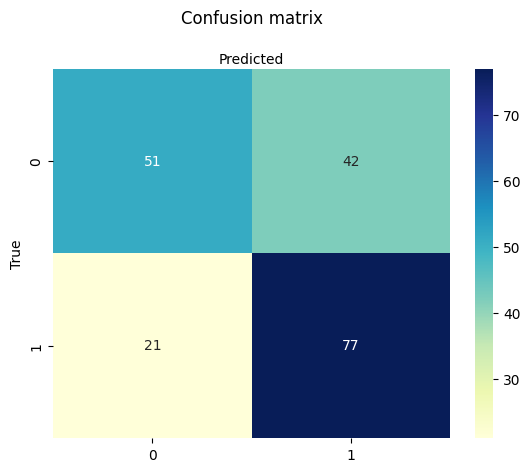

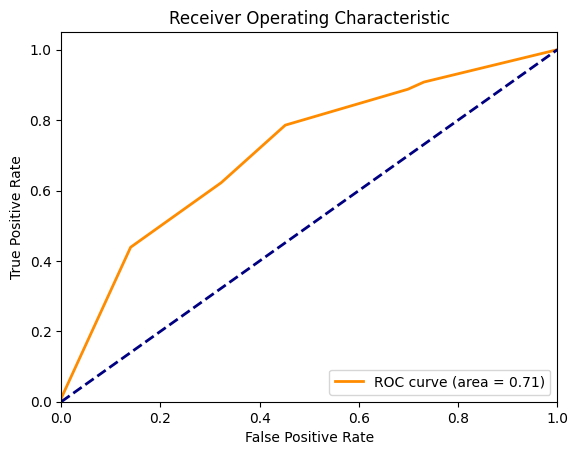

Accuracy: 0.6701570680628273
Confusion Matrix:
[[51 42]
 [21 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.55      0.62        93
           1       0.65      0.79      0.71        98

    accuracy                           0.67       191
   macro avg       0.68      0.67      0.66       191
weighted avg       0.68      0.67      0.67       191

Índices Gini de cada nodo del árbol:
[0.49950288 0.44612785 0.3633781  0.25086505 0.46347699 0.49756625
 0.49991988 0.24489796 0.42174858 0.49346939 0.45918367 0.47704082
 0.33673469 0.         0.31108493]


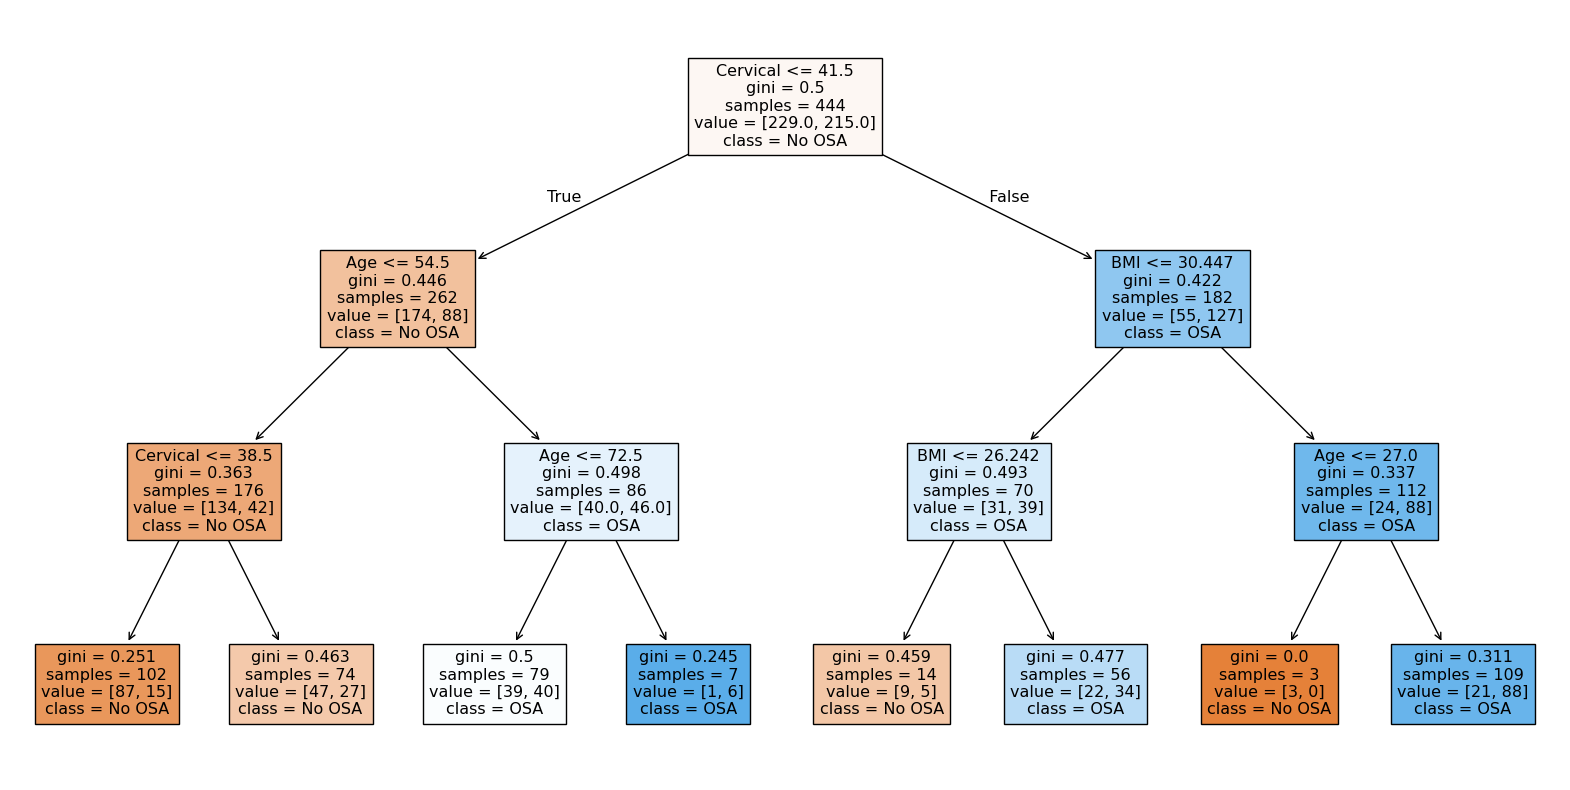

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

# Verifica los nombres de las columnas después de la codificación one-hot
print(df.columns)

# Convertir la variable continua 'IAH' en una variable binaria
# Por ejemplo, umbral de 35 para clasificar como OSA (1) o no OSA (0)
df['OSA'] = (df['IAH'] >= 15).astype(int)
# Convierte la columna 'Gender' a una representación numérica 1 o 0
df['Gender'] = (df['Gender'] == 'hombre').astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['BMI', 'Age', 'Cervical','Gender']]
y = df['OSA']  # Variable dependiente (0 o 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred) 
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels)) 
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
class_report = classification_report(y_test, y_pred)

# Calcular la curva ROC y el AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(cnf_matrix)
print('Classification Report:')
print(class_report)

# Acceder al índice Gini de cada nodo del árbol
gini_indices = model.tree_.impurity
print("Índices Gini de cada nodo del árbol:")
print(gini_indices)

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=['BMI', 'Age', 'Cervical', 'Gender'], class_names=['No OSA', 'OSA'], filled=True, impurity=True)
plt.show()

Random Forest Classifier

Index(['Patient', 'Gender', 'Age', 'Height', 'Weight', 'IAH', 'Cervical',
       'Smoker', 'Snorer', 'Diseases', 'BMI'],
      dtype='object')


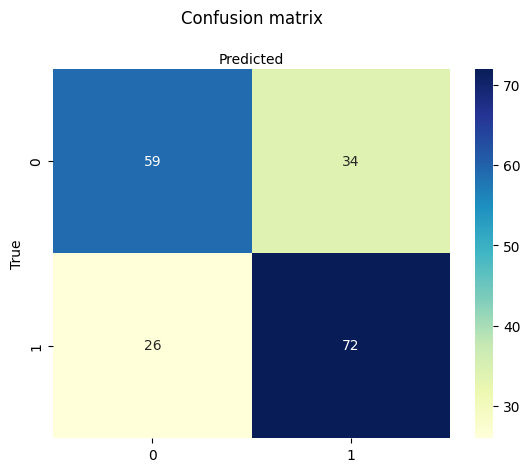

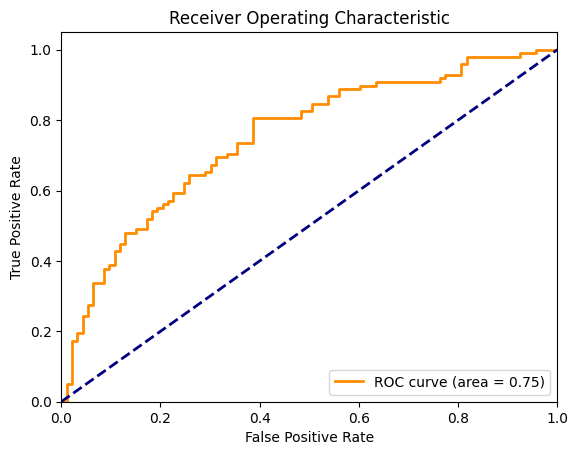

Accuracy: 0.6858638743455497
Confusion Matrix:
[[59 34]
 [26 72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        93
           1       0.68      0.73      0.71        98

    accuracy                           0.69       191
   macro avg       0.69      0.68      0.68       191
weighted avg       0.69      0.69      0.68       191



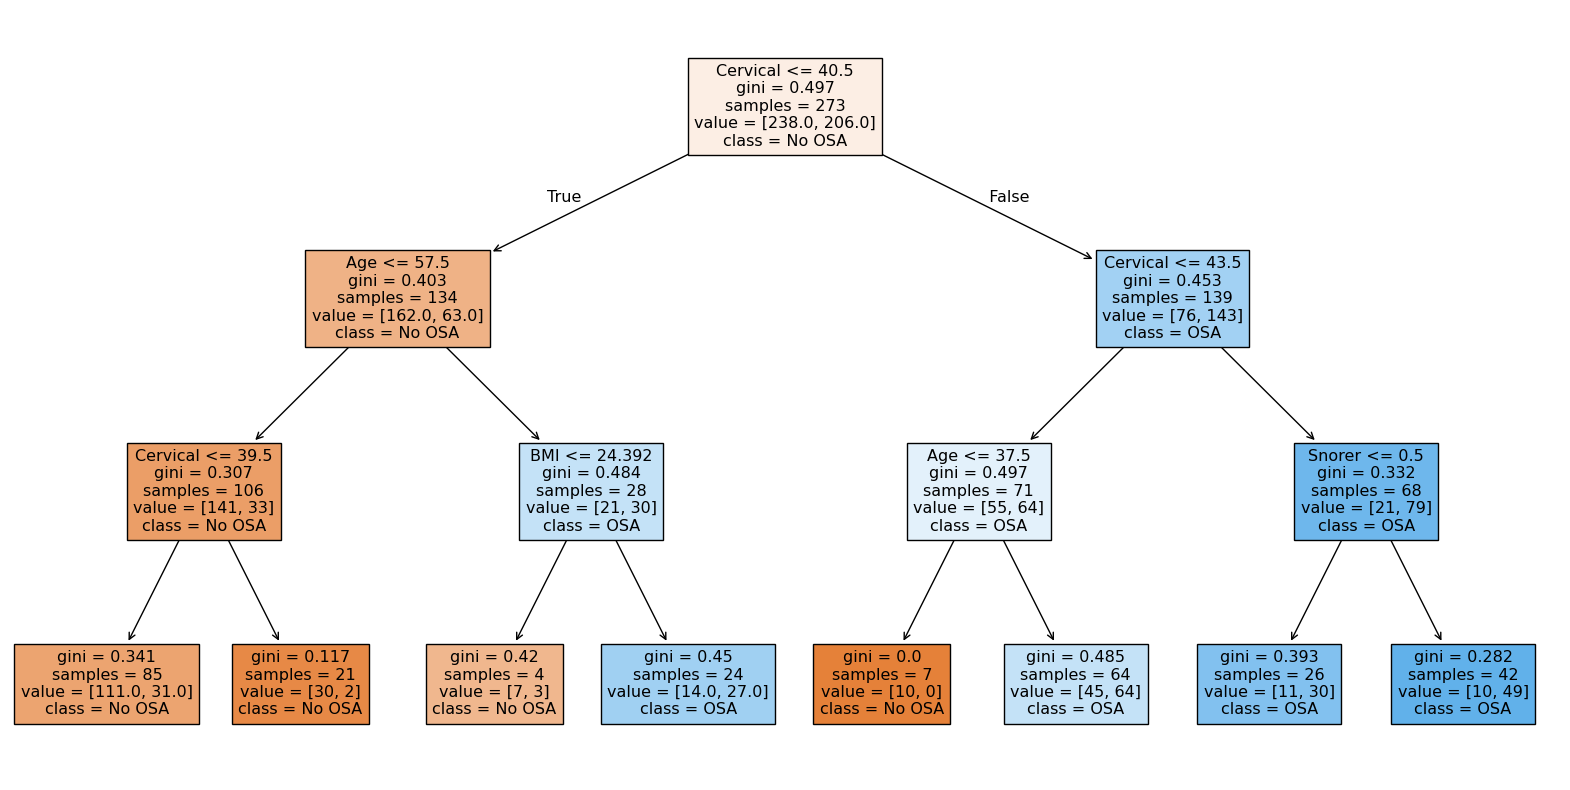

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

# Verifica los nombres de las columnas después de la codificación one-hot
print(df.columns)

# Convertir la variable continua 'IAH' en una variable binaria
# Por ejemplo, umbral de 35 para clasificar como OSA (1) o no OSA (0)
df['OSA'] = (df['IAH'] >= 15).astype(int)
# Convierte la columna 'Gender' a una representación numérica 1 o 0
df['Gender'] = (df['Gender'] == 'hombre').astype(int)
# Convierte la columna 'Snorer' a una representación numérica 1 o 0
df['Snorer'] = (df['Snorer'] == 'si').astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['BMI', 'Age', 'Cervical','Gender','Snorer']]
y = df['OSA']  # Variable dependiente (0 o 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=3)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred) 
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels)) 
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g') 
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')
class_report = classification_report(y_test, y_pred)

# Calcular la curva ROC y el AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(cnf_matrix)
print('Classification Report:')
print(class_report)

# Visualizar uno de los árboles del bosque aleatorio
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=['No OSA', 'OSA'], filled=True)
plt.show()

REGRESSION!!!

Linear regression + validacio KFolder

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,mean_squared_error, root_mean_squared_error, r2_score

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

df['OSA'] = (df['IAH'] >= 15).astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['Age', 'BMI', 'Cervical']]  # Variables independientes
y = df['OSA']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.4136264972951429
Mean Squared Error: 0.2080630252642601
Root Mean Squared Error: 0.45613926082311756
R^2 Score: 0.16717717526163356


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

df['OSA'] = (df['IAH'] >= 15).astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['Age', 'BMI', 'Cervical']]  # Variables independientes
y = df['OSA']  # Variable dependiente

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.sample(frac=0.8, random_state=42)
test = df.loc[~df.index.isin(train.index)]

# Definir el número de pliegues para la validación cruzada
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Inicializar listas para almacenar las métricas de evaluación
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

# Validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predicciones sobre los datos de prueba
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

print(f'Mean Absolute Error: {np.mean(mae_scores)}')
print(f'Mean Squared Error: {np.mean(mse_scores)}')
print(f'Root Mean Squared Error: {np.mean(rmse_scores)}')
print(f'R^2 Score: {np.mean(r2_scores)}')

Mean Absolute Error: 0.40740660793775696
Mean Squared Error: 0.2035701960192915
Root Mean Squared Error: 0.4509271350433015
R^2 Score: 0.183640667210013


Ridge Regression

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

#
df['OSA'] = (df['IAH'] >= 15).astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['BMI', 'Cervical']]  # Variables independientes
y = df['OSA']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de regresión Ridge
model = Ridge(alpha=4.0)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 0.413648905965029
Mean Squared Error: 0.20806573107758852
Root Mean Squared Error: 0.4561422268082495
R^2 Score: 0.1671663445861855


Lasso Regression

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error ,mean_squared_error, root_mean_squared_error, r2_score

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

#
df['OSA'] = (df['IAH'] >= 15).astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['Age', 'BMI', 'Cervical']]  # Variables independientes
y = df['OSA']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de regresión Lasso
model = Lasso(alpha=0.5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.46214827426226623
Mean Squared Error: 0.22313441770188108
Root Mean Squared Error: 0.47237105933988066
R^2 Score: 0.10685026418890475


Decision Tree + validation

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

#
df['OSA'] = (df['IAH'] >= 15).astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['Age', 'BMI', 'Cervical']]  # Variables independientes
y = df['OSA']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Inicializar el modelo de regresión con árbol de decisión
model = DecisionTreeRegressor( max_depth=5 ,random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.39657116881925997
Mean Squared Error: 0.23339766561181402
Root Mean Squared Error: 0.4831124771849864
R^2 Score: 0.05013607327258063


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

# Convertir la variable continua 'IAH' en una variable binaria
df['OSA'] = (df['IAH'] >= 15).astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['Age', 'BMI', 'Cervical']]  # Variables independientes
y = df['OSA']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Inicializar el modelo de regresión con árbol de decisión
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Definir los parámetros para Grid Search
parameters = {
    "splitter": ["best", "random"],
    "max_depth": [1, 3, 5],
    "min_samples_leaf": [1, 2, 3, 4]
}

# Aplicar Grid Search con validación cruzada
tuning_model = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, verbose=3)
tuning_model.fit(X, y)

# Obtener los mejores parámetros y el mejor score
best_params = tuning_model.best_params_
best_score = tuning_model.best_score_

# Inicializar el modelo con los mejores parámetros
tuned_hyper_model = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    splitter=best_params['splitter'],
    random_state=42
)

# Entrenar el modelo con los mejores parámetros
tuned_hyper_model.fit(X_train, y_train)

# Predicciones sobre los datos de prueba con el modelo ajustado
tuned_pred = tuned_hyper_model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, tuned_pred)
mse = mean_squared_error(y_test, tuned_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, tuned_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END max_depth=1, min_samples_leaf=1, splitter=best;, score=-0.226 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=1, splitter=best;, score=-0.221 total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=1, splitter=best;, score=-0.232 total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=1, splitter=random;, score=-0.229 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=1, splitter=random;, score=-0.245 total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=1, splitter=random;, score=-0.249 total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-0.226 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-0.221 total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=2, splitter=best;, score=-0.232 total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=2, splitter=random;, score=-0.229 total time

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Nearest Neighbours * GrindSearch

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

#
df['OSA'] = (df['IAH'] >= 15).astype(int)

# Seleccionar características (X) y la variable objetivo (y)
X = df[['Age', 'BMI', 'Cervical']]  # Variables independientes
y = df['OSA']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo de Nearest Neighbors
model = KNeighborsRegressor()

# Definir el espacio de búsqueda para Grid Search
param_grid = {'n_neighbors': [20, 50, 100, 150]}

# Aplicar Grid Search con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por Grid Search
best_model = grid_search.best_estimator_

# Predicciones sobre los datos de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.43958115183246077
Mean Squared Error: 0.21721884816753928
Root Mean Squared Error: 0.46606742877778884
R^2 Score: 0.13052876892692566
